<a href="https://colab.research.google.com/github/SophiaEC/CovidSample/blob/main/SCCodeSample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Description**   

The below analysis explores the effect of income on Covid-19 vaccination rates for adults in the United States. To this end, we regress the median income on vaccine completion rates for every county in the United States in December 2022. The analysis also controls for political affiliation (Democrat, Republican, Independant, or other) to examine the potential impact of partisanship on vaccination.
  

This analysis will use the following three data sets:
*   COVID-19_Vaccinations_in_the_United_States_County.csv
*   Sen Vote Data.csv
*   Income by County.csv



**NOTE TO PERSPECTIVE EMPLOYERS:** *While this project as a whole was conducted with the support of a team, the coding section below is mine.*












## 1. Data Cleaning/Preparation
In this section, I will eliminate unncessary information from our datasets and consolidate our dataframes in preparation for regression. I also create dummy variables representing the majority political affiliation of each county, which is determined by the party of each county's most popular senatorial candidate in the 2022 senatorial election.



In [29]:
# Install dplyr
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
#Get covid data
covid_county <- as.data.frame(read.csv("/content/COVID-19_Vaccinations_in_the_United_States_County.csv"))
head(covid_county)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,X,X.1,⋯,X.62,X.63,X.64,X.65,X.66,X.67,X.68,X.69,X.70,X.71
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,12/28/2022,48075,52,Childress County,TX,98.9,3768,51.6,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,12/28/2022,UNK,52,Unknown County,GA,88.9,1096697,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,12/28/2022,6045,52,Mendocino County,CA,97.7,67433,77.7,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,12/28/2022,16077,52,Power County,ID,97.7,4481,58.3,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,12/28/2022,36095,52,Schoharie County,NY,97.5,19655,63.4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,12/28/2022,53023,52,Garfield County,WA,96.0,1166,52.4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [32]:
#Filter to capture point-in-time vax rates (on 12/28/2022)
End2022_Covid <- subset(covid_county, Date == "12/28/2022")
head(End2022_Covid)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,X,X.1,⋯,X.62,X.63,X.64,X.65,X.66,X.67,X.68,X.69,X.70,X.71
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,12/28/2022,48075,52,Childress County,TX,98.9,3768,51.6,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,12/28/2022,UNK,52,Unknown County,GA,88.9,1096697,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,12/28/2022,6045,52,Mendocino County,CA,97.7,67433,77.7,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,12/28/2022,16077,52,Power County,ID,97.7,4481,58.3,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,12/28/2022,36095,52,Schoharie County,NY,97.5,19655,63.4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,12/28/2022,53023,52,Garfield County,WA,96.0,1166,52.4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [34]:
#Get tidyr
library(tidyr)

#Cleaning dataframe: Changing column names for consistency and discarding unnecessary content
Covid_Clean <- End2022_Covid %>%
  separate(Recip_County, into = c("County", "Extra"), sep = " ", extra="merge")

Covid_Clean <- Covid_Clean[, c("County", "Recip_State", "Completeness_pct")]
head(Covid_Clean)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [1967].”


,County,Recip_State,Completeness_pct
,<chr>,<chr>,<dbl>
1,Childress,TX,98.9
2,Unknown,GA,88.9
3,Mendocino,CA,97.7
4,Power,ID,97.7
5,Schoharie,NY,97.5
6,Garfield,WA,96.0


In [35]:
#Get income data
income_county <- read.csv("/Income by County (1).csv")

#Rename columns for consistency
colnames(income_county) <- c("County", "Income")

#Convert column contents to numeric
income_county$Income <- gsub(",", "", income_county$Income)
income_county$Income <- as.numeric(income_county$Income)


In [11]:
#Merge vax rates and income by county to get most_data
most_data <- merge(Covid_Clean, income_county, by= "County")
head(most_data)
min(most_data$Completeness_pct,na.rm = TRUE)

,County,Recip_State,Completeness_pct,Income
,<chr>,<chr>,<dbl>,<dbl>
1,Abbeville,SC,93.0,39840
2,Acadia,LA,96.9,45671
3,Accomack,VA,78.2,54153
4,Ada,ID,97.7,67555
5,Adair,IA,97.3,67668
6,Adair,IA,97.3,36808


[1] 73.4

In [13]:
#Get voting data
county_votes <- as.data.frame(read.csv("/Sen Vote Data.csv"))

#Adjust county name format and remove NAs
county_votes_clean <- county_votes %>%
  separate(County, into = c("State","County"), sep = "@")

county_votes_clean[is.na(county_votes_clean)] <- 0
tail(county_votes_clean)

,State,County,DemVote,LibVote,OthVote,RepVote,AllVote
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
2031,WI,WASHINGTON,21566,0,0,52401,73967
2032,WI,WAUKESHA,83408,0,509,140156,224073
2033,WI,WAUPACA,7653,0,42,15525,23220
2034,WI,WAUSHARA,3567,0,3,7765,11335
2035,WI,WINNEBAGO,34860,0,185,39372,74417
2036,WI,WOOD,12925,0,64,20004,32993


In [14]:
# Create a new column Majority_Party to indicate which party won the majority vote in each county.
county_votes_clean$Majority <- do.call(pmax, county_votes_clean[,3:6])
head(county_votes_clean)

county_votes_clean$Majority_Party <- ifelse(
county_votes_clean$Majority == county_votes_clean$DemVote, "Dem",
ifelse (
  county_votes_clean$Majority == county_votes_clean$RepVote, "Rep",
ifelse(
  county_votes_clean$Majority == county_votes_clean$LibVote, "Oth",
  ifelse(
    county_votes_clean$Majority == county_votes_clean$OthVote, "Oth",
    NA
  )
)
)
)
#head(county_votes_clean)
#tail(county_votes_clean)


,State,County,DemVote,LibVote,OthVote,RepVote,AllVote,Majority
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,AL,AUTAUGA,3814,532,35,13359,17740,13359
2,AL,BALDWIN,11478,2092,126,59501,73197,59501
3,AL,BARBOUR,2620,60,2,3861,6543,3861
4,AL,BIBB,971,188,16,4694,5869,4694
5,AL,BLOUNT,1130,519,33,14904,16586,14904
6,AL,BULLOCK,1827,31,1,785,2644,1827


,State,County,DemVote,LibVote,OthVote,RepVote,AllVote,Majority,Majority_Party
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,AL,AUTAUGA,3814,532,35,13359,17740,13359,Rep
2,AL,BALDWIN,11478,2092,126,59501,73197,59501,Rep
3,AL,BARBOUR,2620,60,2,3861,6543,3861,Rep
4,AL,BIBB,971,188,16,4694,5869,4694,Rep
5,AL,BLOUNT,1130,519,33,14904,16586,14904,Rep
6,AL,BULLOCK,1827,31,1,785,2644,1827,Dem


,State,County,DemVote,LibVote,OthVote,RepVote,AllVote,Majority,Majority_Party
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
2031,WI,WASHINGTON,21566,0,0,52401,73967,52401,Rep
2032,WI,WAUKESHA,83408,0,509,140156,224073,140156,Rep
2033,WI,WAUPACA,7653,0,42,15525,23220,15525,Rep
2034,WI,WAUSHARA,3567,0,3,7765,11335,7765,Rep
2035,WI,WINNEBAGO,34860,0,185,39372,74417,39372,Rep
2036,WI,WOOD,12925,0,64,20004,32993,20004,Rep


In [15]:
# Adding columns for dummy variables representing majority vote.

# If the Majority_party column is "Oth" it will show 1, if not it will show 0
county_votes_clean$Oth_Dummy <- ifelse(county_votes_clean$Majority_Party == "Oth", 1, 0)

# If the Majority_party column is "Rep" it will show 1, if not it will show 0
county_votes_clean$Rep_Dummy <- ifelse(county_votes_clean$Majority_Party == "Rep", 1, 0)

#head(county_votes_clean)

,State,County,DemVote,LibVote,OthVote,RepVote,AllVote,Majority,Majority_Party,Oth_Dummy,Rep_Dummy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,AL,AUTAUGA,3814,532,35,13359,17740,13359,Rep,0,1
2,AL,BALDWIN,11478,2092,126,59501,73197,59501,Rep,0,1
3,AL,BARBOUR,2620,60,2,3861,6543,3861,Rep,0,1
4,AL,BIBB,971,188,16,4694,5869,4694,Rep,0,1
5,AL,BLOUNT,1130,519,33,14904,16586,14904,Rep,0,1
6,AL,BULLOCK,1827,31,1,785,2644,1827,Dem,0,0


In [16]:
#Get stringr
library(stringr)

#Adjust county names for consistency
county_votes_clean$County <- str_to_title(county_votes_clean$County)
#head(county_votes_clean)

,State,County,DemVote,LibVote,OthVote,RepVote,AllVote,Majority,Majority_Party,Oth_Dummy,Rep_Dummy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,AL,Autauga,3814,532,35,13359,17740,13359,Rep,0,1
2,AL,Baldwin,11478,2092,126,59501,73197,59501,Rep,0,1
3,AL,Barbour,2620,60,2,3861,6543,3861,Rep,0,1
4,AL,Bibb,971,188,16,4694,5869,4694,Rep,0,1
5,AL,Blount,1130,519,33,14904,16586,14904,Rep,0,1
6,AL,Bullock,1827,31,1,785,2644,1827,Dem,0,0


In [17]:
#Merge most_data and county_votes to get all_data
all_data <- merge(most_data, county_votes_clean, by = "County")
min(all_data$Completeness_pct, na.rm=FALSE)
#head(all_data)

[1] NA

,County,Recip_State,Completeness_pct,Income,State,DemVote,LibVote,OthVote,RepVote,AllVote,Majority,Majority_Party,Oth_Dummy,Rep_Dummy
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,Abbeville,SC,93.0,39840,SC,4620,0,0,12518,17146,12518,Rep,0,1
2,Acadia,LA,96.9,45671,LA,3033,47,343,16224,19647,16224,Rep,0,1
3,Ada,ID,97.7,67555,ID,76656,1174,19112,87579,184521,87579,Rep,0,1
4,Adair,KY,94.1,41664,IA,1774,0,52,4558,6384,4558,Rep,0,1
5,Adair,KY,94.1,41664,OK,2537,150,218,7517,10422,7517,Rep,0,1
6,Adair,KY,94.1,41664,KY,1075,0,0,5249,6324,5249,Rep,0,1


In [18]:
distinct(all_data, County, Recip_State, .keep_all=TRUE) %>% count(Majority_Party)

Majority_Party,n
<chr>,<int>
Dem,230
Oth,17
Rep,2119


## 2. Running Regressions
 First, a simple regression model ("Mini_model") examines the relationship between income and vaccination rates without political controls. Next, a multiple regression model ("Model")incorporates political party dummy variables (Oth_Dummy and Rep_Dummy) to analyze the combined effects of income and political preferences. These models allow us to explore the extent to which income and political affiliation explain variations in vaccination rates.

In [19]:
#Mini_model: regressing vax as a function of income
mini_model <- lm(Completeness_pct ~ Income, data=most_data)
summary(mini_model)


Call:
lm(formula = Completeness_pct ~ Income, data = most_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.677  -1.336   1.743   2.924   4.217 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.521e+01  1.349e-01 705.869   <2e-16 ***
Income      -3.620e-06  2.477e-06  -1.461    0.144    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.271 on 14775 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.0001445,	Adjusted R-squared:  7.687e-05 
F-statistic: 2.136 on 1 and 14775 DF,  p-value: 0.1439


In [20]:
#Full model: Mini_model plus dummies for majority party
model <- lm(Completeness_pct ~ Income + Oth_Dummy + Rep_Dummy, data = all_data)
summary(model)


Call:
lm(formula = Completeness_pct ~ Income + Oth_Dummy + Rep_Dummy, 
    data = all_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.787  -1.297   1.714   2.779   3.968 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  9.527e+01  5.851e-02 1628.077   <2e-16 ***
Income      -2.202e-06  9.034e-07   -2.438   0.0148 *  
Oth_Dummy   -7.504e-02  9.815e-02   -0.765   0.4445    
Rep_Dummy   -7.074e-02  3.577e-02   -1.978   0.0480 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.277 on 141428 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  6.807e-05,	Adjusted R-squared:  4.686e-05 
F-statistic: 3.209 on 3 and 141428 DF,  p-value: 0.02202


## **3. Visualizing Data**
In this section, we will visually represent the regression models developed in Section 2 to better understand the relationships between variables. Specifically, we will plot the **simple regression model** to show how **income** influences COVID-19 vaccination completeness percentages. Additionally, we will visualize the **multiple regression model** to explore how both **income** and political affiliations (represented by dummy variables) impact vaccination rates. These visualizations will provide a clearer interpretation of the trends, patterns, and insights revealed by the regression analysis.


In [21]:
#Get ggplot
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


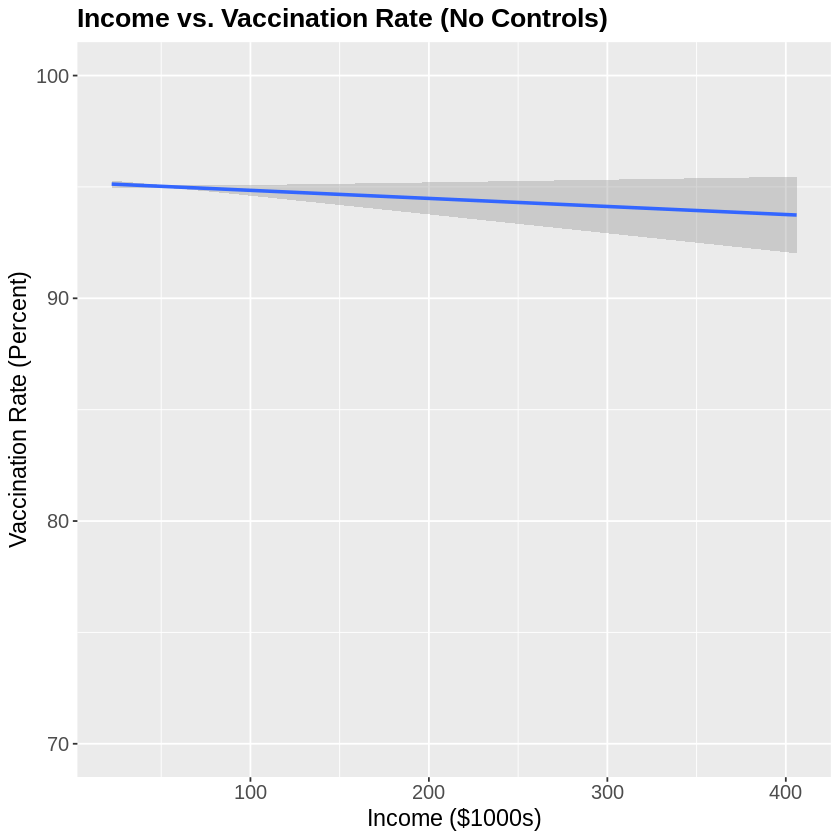

In [22]:
#Visualization 1: Income v. Vax rate from Mini_model (no dummies)
mini_plot <- ggplot(mini_model, aes(x=Income, y = Completeness_pct)) +
  geom_smooth(method="lm", se= TRUE) +
   xlab("Income ($1000s)") +
   ylab("Vaccination Rate (Percent)") +
     ggtitle("Income vs. Vaccination Rate (No Controls)") +
       scale_x_continuous(labels = scales::label_number(scale = 1e-3)) +# Scale x-axis by 1000
            scale_y_continuous(limits=c(70,100)) +
        theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )
mini_plot

`geom_smooth()` using formula = 'y ~ x'


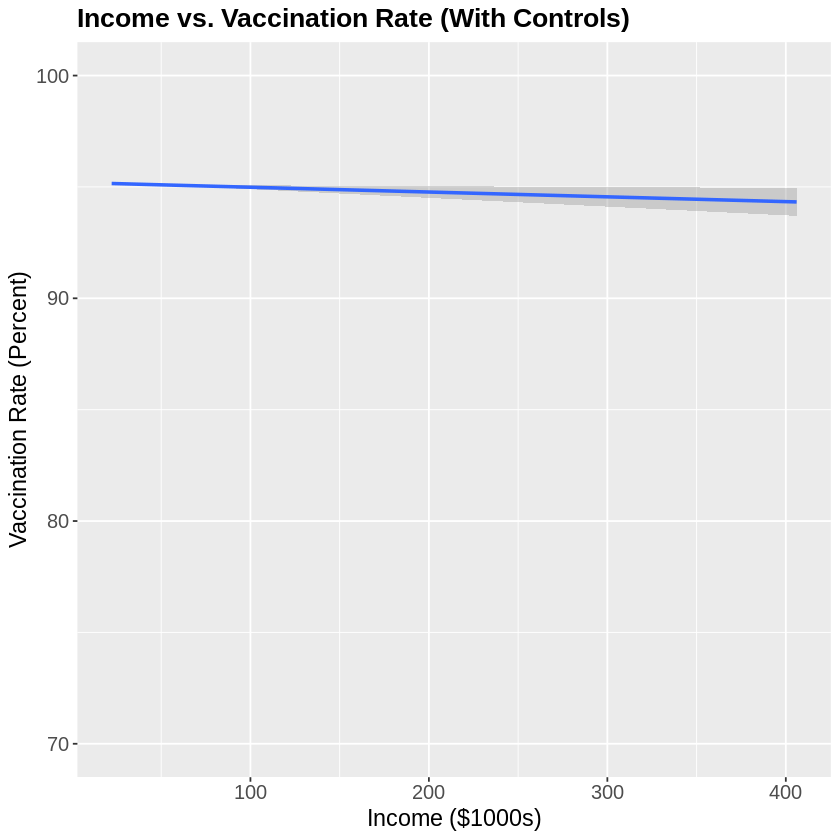

In [24]:
#Visualization 2: Income v. Vax Rate from model (WITH dummies)
full_plot <- ggplot(model, aes(x=Income, y=Completeness_pct)) +
  geom_smooth(method = "lm", se = TRUE) +
   xlab("Income ($1000s)") +
   ylab("Vaccination Rate (Percent)") +
     ggtitle("Income vs. Vaccination Rate (With Controls)") +
       scale_x_continuous(labels = scales::label_number(scale = 1e-3)) +
         scale_y_continuous(limits=c(70,100)) +
        theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )
  full_plot

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 14 rows containing non-finite outside the scale range
(`stat_smooth()`).”


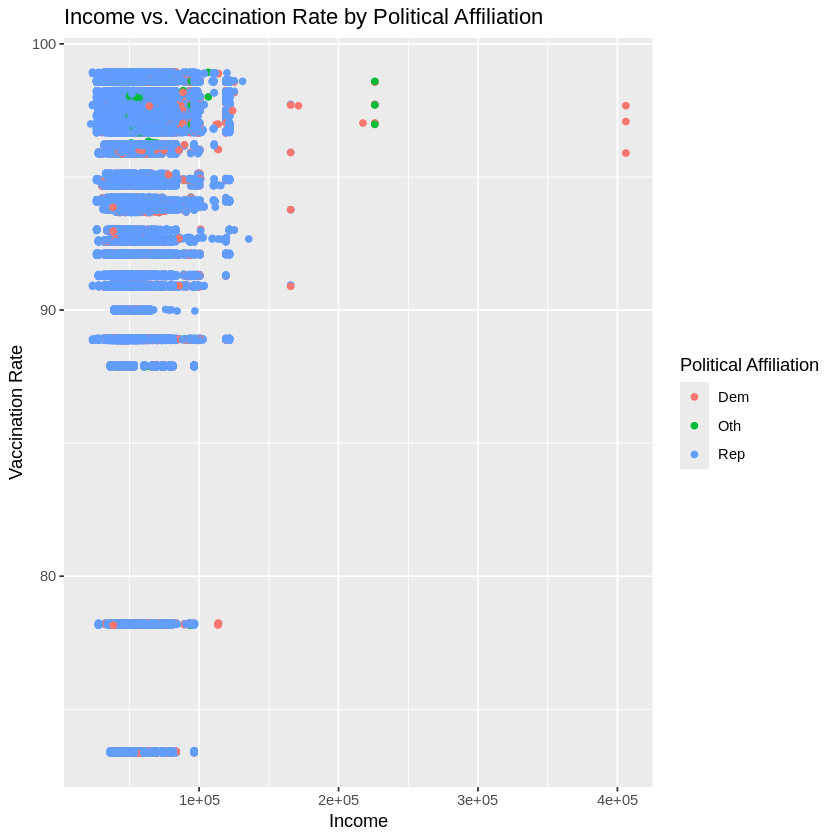

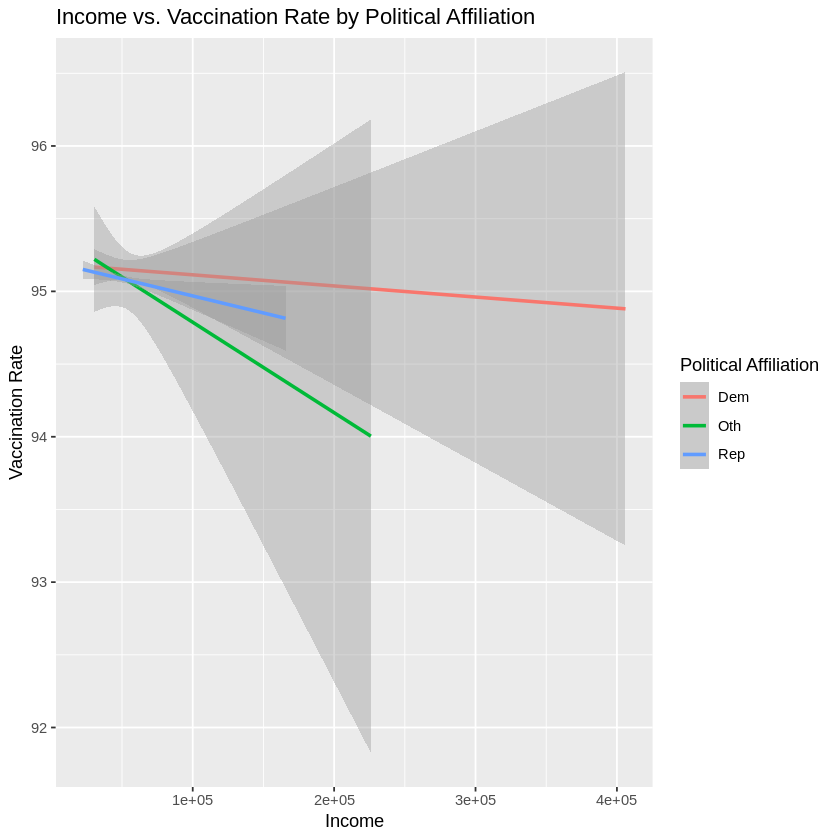

In [26]:


#Visualization 3: Scatterplot with points colored by affiliation
ggplot(all_data, aes(x = Income, y = Completeness_pct, color = Majority_Party)) +
  geom_jitter() +
  labs(title = "Income vs. Vaccination Rate by Political Affiliation",
       x = "Income",
       y = "Vaccination Rate",
       color = "Political Affiliation")

#Visualization 4: By Political Affiliation (Scatterplot + best fit line)
ggplot(all_data, aes(x = Income, y = Completeness_pct, color = Majority_Party)) +
  geom_smooth(method = "lm") +
  labs(title = "Income vs. Vaccination Rate by Political Affiliation",
       x = "Income",
       y = "Vaccination Rate",
       color = "Political Affiliation")
